<a href="https://colab.research.google.com/github/vicentemf/predictive-models/blob/main/imobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
dados=pd.read_csv("regressao_log_imobiliaria.csv",sep=';')
dados.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [5]:
dados.shape

(5000, 4)

In [6]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [7]:
dados.corr().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Praia,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de Frequências')

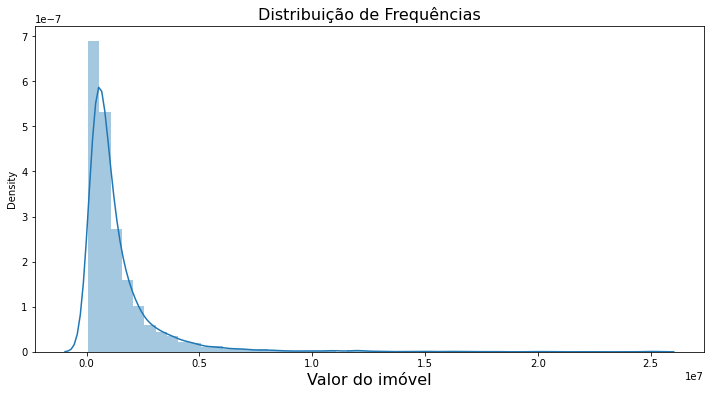

In [8]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Valor do imóvel",fontsize=16)
ax.set_title("Distribuição de Frequências",fontsize=16)

Text(0.5, 0.98, 'Dispersão entre variáveis')

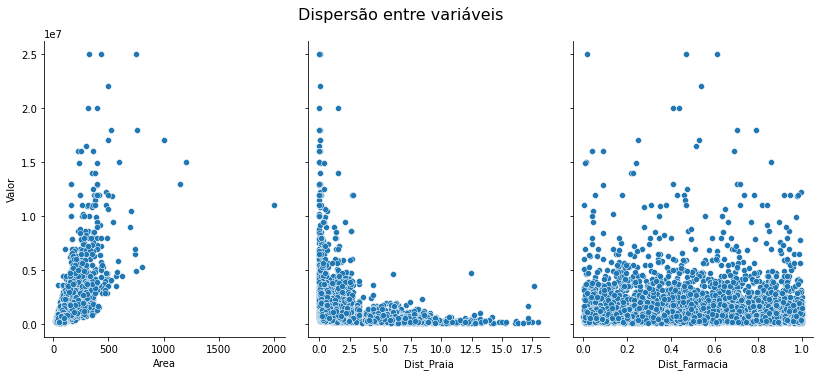

In [10]:
ax=sns.pairplot(dados,y_vars=["Valor"],x_vars=["Area","Dist_Praia","Dist_Farmacia"])
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Dispersão entre variáveis",fontsize=16)

Text(0.5, 0.98, 'Dispersão entre variáveis')

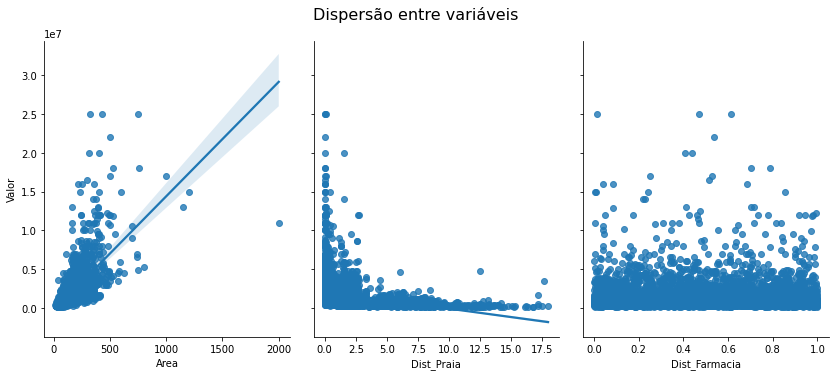

In [11]:
ax=sns.pairplot(dados,y_vars=["Valor"],x_vars=["Area","Dist_Praia","Dist_Farmacia"],kind='reg')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Dispersão entre variáveis",fontsize=16)

Transformação logarítmica

In [12]:
dados["log_valor"]=np.log(dados["Valor"])
dados["log_area"]=np.log(dados["Area"])
dados["log_praia"]=np.log(dados["Dist_Praia"]+1)
dados["log_farmacia"]=np.log(dados["Dist_Farmacia"]+1)

In [13]:
dados.head(5)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_valor,log_area,log_praia,log_farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição de freqûencia')

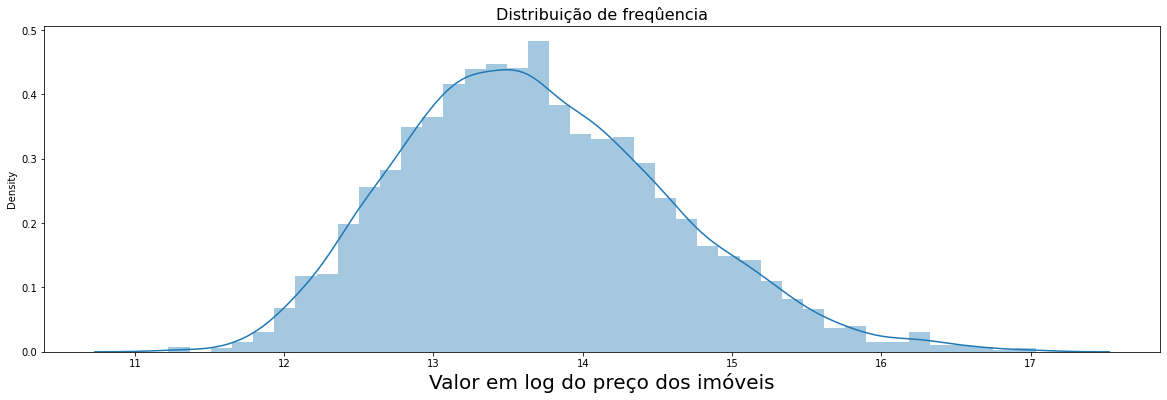

In [14]:
ax=sns.distplot(dados["log_valor"])
ax.figure.set_size_inches(20,6)
ax.set_xlabel("Valor em log do preço dos imóveis",fontsize=20)
ax.set_title("Distribuição de freqûencia",fontsize=16)

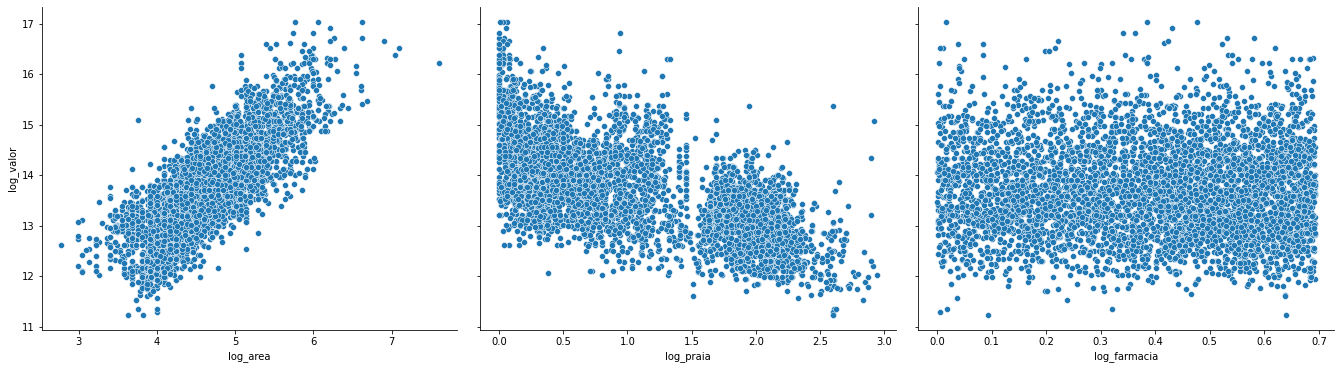

In [15]:
ax=sns.pairplot(dados,y_vars=["log_valor"],x_vars=["log_area","log_praia","log_farmacia"])
ax.figure.set_size_inches(20,6)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y=dados['log_valor']
x=dados[["log_area","log_praia","log_farmacia"]]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
x_train_const = sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
modelo_statsmodels = sm.OLS(y_train,x_train_const,hasconst=True).fit()

In [23]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     5369.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:23:52   Log-Likelihood:                -2037.4
No. Observations:                4000   AIC:                             4083.
Df Residuals:                    3996   BIC:                             4108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.3912      0.061    154.766   

In [24]:
x=dados[["log_area","log_praia"]]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train_const=sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
modelo_statsmodels= sm.OLS(y_train,x_train_const,hascont=True).fit()

In [29]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     7998.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        02:24:47   Log-Likelihood:                -2032.6
No. Observations:                4000   AIC:                             4071.
Df Residuals:                    3997   BIC:                             4090.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4163      0.059    159.070      0.0

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
modelo= LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

In [32]:
print(f"R²={(modelo.score(x_train,y_train).round(3))}")

R²=0.8


In [33]:
y_previsto=modelo.predict(x_test)

In [34]:
print(f"R²={(metrics.r2_score(y_test,y_previsto).round(3))}")

R²=0.81


In [35]:
entrada=x_test
entrada[0:1]

,log_area,log_praia
2187,4.442651,0.565247


In [36]:
modelo.predict(entrada)[0]

13.755371911089963

In [37]:
print(f'O valor do imóvel é de {(np.exp(14.28482006184788).round(0))} reais')

O valor do imóvel é de 1598890.0 reais


SIMULADOR

In [ ]:
#area= 150
#dist_praia=1
#entrada=[[np.log(area),np.log(dist_praia + 1)]]
#print(f'O valor do imóvel é de {(np.exp(modelo.predict(entrada)[0].round(3)))} reais')

In [38]:
modelo.intercept_

9.416333366131926

In [39]:
print(f'{(np.exp(9.334916409800329).round(0))} reais')

11327.0 reais


In [40]:
modelo.coef_

array([ 1.03939893, -0.49296765])

In [42]:
x.columns
index=["intercepto","log area","log distância da praia"]

In [43]:
pd.DataFrame(data=np.append(np.exp(modelo.intercept_),modelo.coef_),index=index,columns=["parâmetros"])

,parâmetros
intercepto,12287.445956
log area,1.039399
log distância da praia,-0.492968


Intercepto=excluindo os efeitos da variáveis x ,o efeito médio do preço dos imóveis seria deste valor (11.327 reais)

Mantendo-se o valor da distância até a praia constante,um acrescimento de 1% na área do imóvel geraria acréscimo de 1.06% no preço do imóvel

Mantendo-se o valor da área constante,um acrescimento de 1% na distância até a praia,geraria um decréscimo de 0.49% no preço do imóvel

In [44]:
y_previsto_train=modelo.predict(x_train)

Text(0.5, 0, 'log do preço previsão')

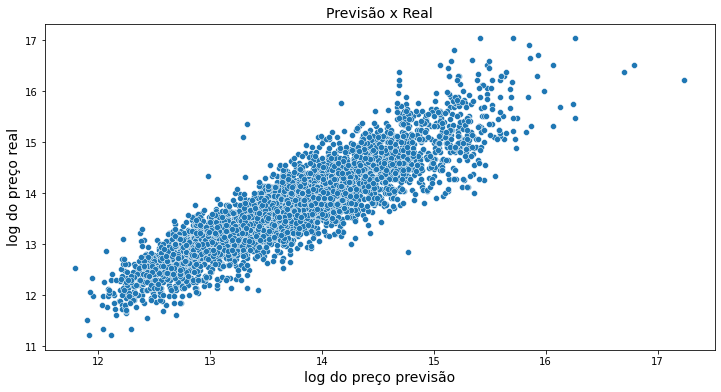

In [45]:
ax=sns.scatterplot(x=y_previsto_train,y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsão x Real",fontsize=14)
ax.set_ylabel("log do preço real",fontsize=14)
ax.set_xlabel("log do preço previsão",fontsize=14)

O último gráfico serve para verificar a qualidade do nosso ajuste,podemos perceber que a grande maioria dos dados estão dentro de um ajuste saudável onde os dados "soltos" são de imóveis que deturpam a análise(imóveis com grande área porém muito distantes da praia por exemplo..)